<a href="https://colab.research.google.com/github/Rahulaggl/Credit_card_Fd/blob/main/CCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install gdown

In [ ]:
import gdown

# File ID from the shareable link
file_id = '1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK'

# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
output = 'creditcard.csv'
gdown.download(download_url, output, quiet=False)

# Load the CSV file into a DataFrame
import pandas as pd
data = pd.read_csv(output)
data.head()  # Display the first few rows of the dataset


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK
From (redirected): https://drive.google.com/uc?export=download&id=1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK&confirm=t&uuid=c636695f-fa17-4a97-97d1-5d39419e0cce
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:01<00:00, 148MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display number of rows and columns
data.shape
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


In [ ]:
# Display information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


Data Managing

In [ ]:
# Standardize the 'Amount' column
# Check the first few rows after transformation
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Drop the 'Time' column
# Check the first few rows after dropping the column
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Drop duplicate rows from the dataset
# Check the new shape of the dataset
data = data.drop_duplicates()
data.shape

(275663, 30)

In [ ]:
# Count the number of fraud (Class=1) and non-fraud (Class=0) cases
data['Class'].value_counts()


,count
Class,
0,275190
1,473


In [ ]:
# Separate features (X) and target (y)
# Split the data into training and testing sets
X = data.drop('Class',axis=1)
y = data['Class']
corr=data.corr()
corr


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.009002,0.005952,-0.000042,-0.018593,-0.005789,-0.006843,-0.000490,-0.007093,0.003115,...,0.006004,0.003634,-0.007504,-0.009327,-0.004446,-0.002436,-0.014628,-0.003555,-0.225854,-0.094718
V2,0.009002,1.000000,0.004976,-0.004095,0.004655,0.004290,0.004866,0.003743,0.001116,0.002764,...,-0.003881,0.002909,-0.003689,0.001974,-0.002837,-0.000296,0.007252,0.001458,-0.534153,0.084754
V3,0.005952,0.004976,1.000000,-0.000721,0.011020,0.014780,-0.014016,0.003733,-0.002896,-0.011064,...,0.001818,-0.004203,0.002183,0.009782,0.004091,0.003596,-0.008780,-0.002454,-0.220547,-0.185772
V4,-0.000042,-0.004095,-0.000721,1.000000,0.006710,0.012535,0.000806,0.004996,0.001395,0.003366,...,-0.000623,0.001581,-0.000155,0.005759,0.000173,-0.001105,0.002517,0.000028,0.100626,0.130313
V5,-0.018593,0.004655,0.011020,0.006710,1.000000,-0.029701,-0.009107,-0.002605,-0.000786,-0.002818,...,0.003439,0.002971,-0.001058,-0.012634,-0.004862,-0.001568,-0.006116,-0.000711,-0.390280,-0.088642
V6,-0.005789,0.004290,0.014780,0.012535,-0.029701,1.000000,0.013087,-0.012301,-0.002290,-0.002723,...,-0.001584,0.002355,-0.000221,-0.021098,-0.006673,0.000702,-0.001577,0.000617,0.224967,-0.044777
V7,-0.006843,0.004866,-0.014016,0.000806,-0.009107,0.013087,1.000000,-0.000987,-0.001657,-0.012246,...,0.008635,-0.001701,0.003458,0.005375,0.002070,-0.000459,-0.003977,0.001329,0.401573,-0.173292
V8,-0.000490,0.003743,0.003733,0.004996,-0.002605,-0.012301,-0.000987,1.000000,0.000168,0.000239,...,0.018806,-0.005182,0.006461,-0.006000,-0.002827,-0.001122,-0.000108,0.000201,-0.104572,0.033364
V9,-0.007093,0.001116,-0.002896,0.001395,-0.000786,-0.002290,-0.001657,0.000168,1.000000,-0.004957,...,0.001744,0.000742,-0.001739,-0.002454,-0.000358,0.005307,0.008066,0.006487,-0.041446,-0.094583
V10,0.003115,0.002764,-0.011064,0.003366,-0.002818,-0.002723,-0.012246,0.000239,-0.004957,1.000000,...,0.002396,-0.003012,0.001760,0.001015,0.002499,-0.000859,0.011495,0.009956,-0.104586,-0.208104


<Axes: >

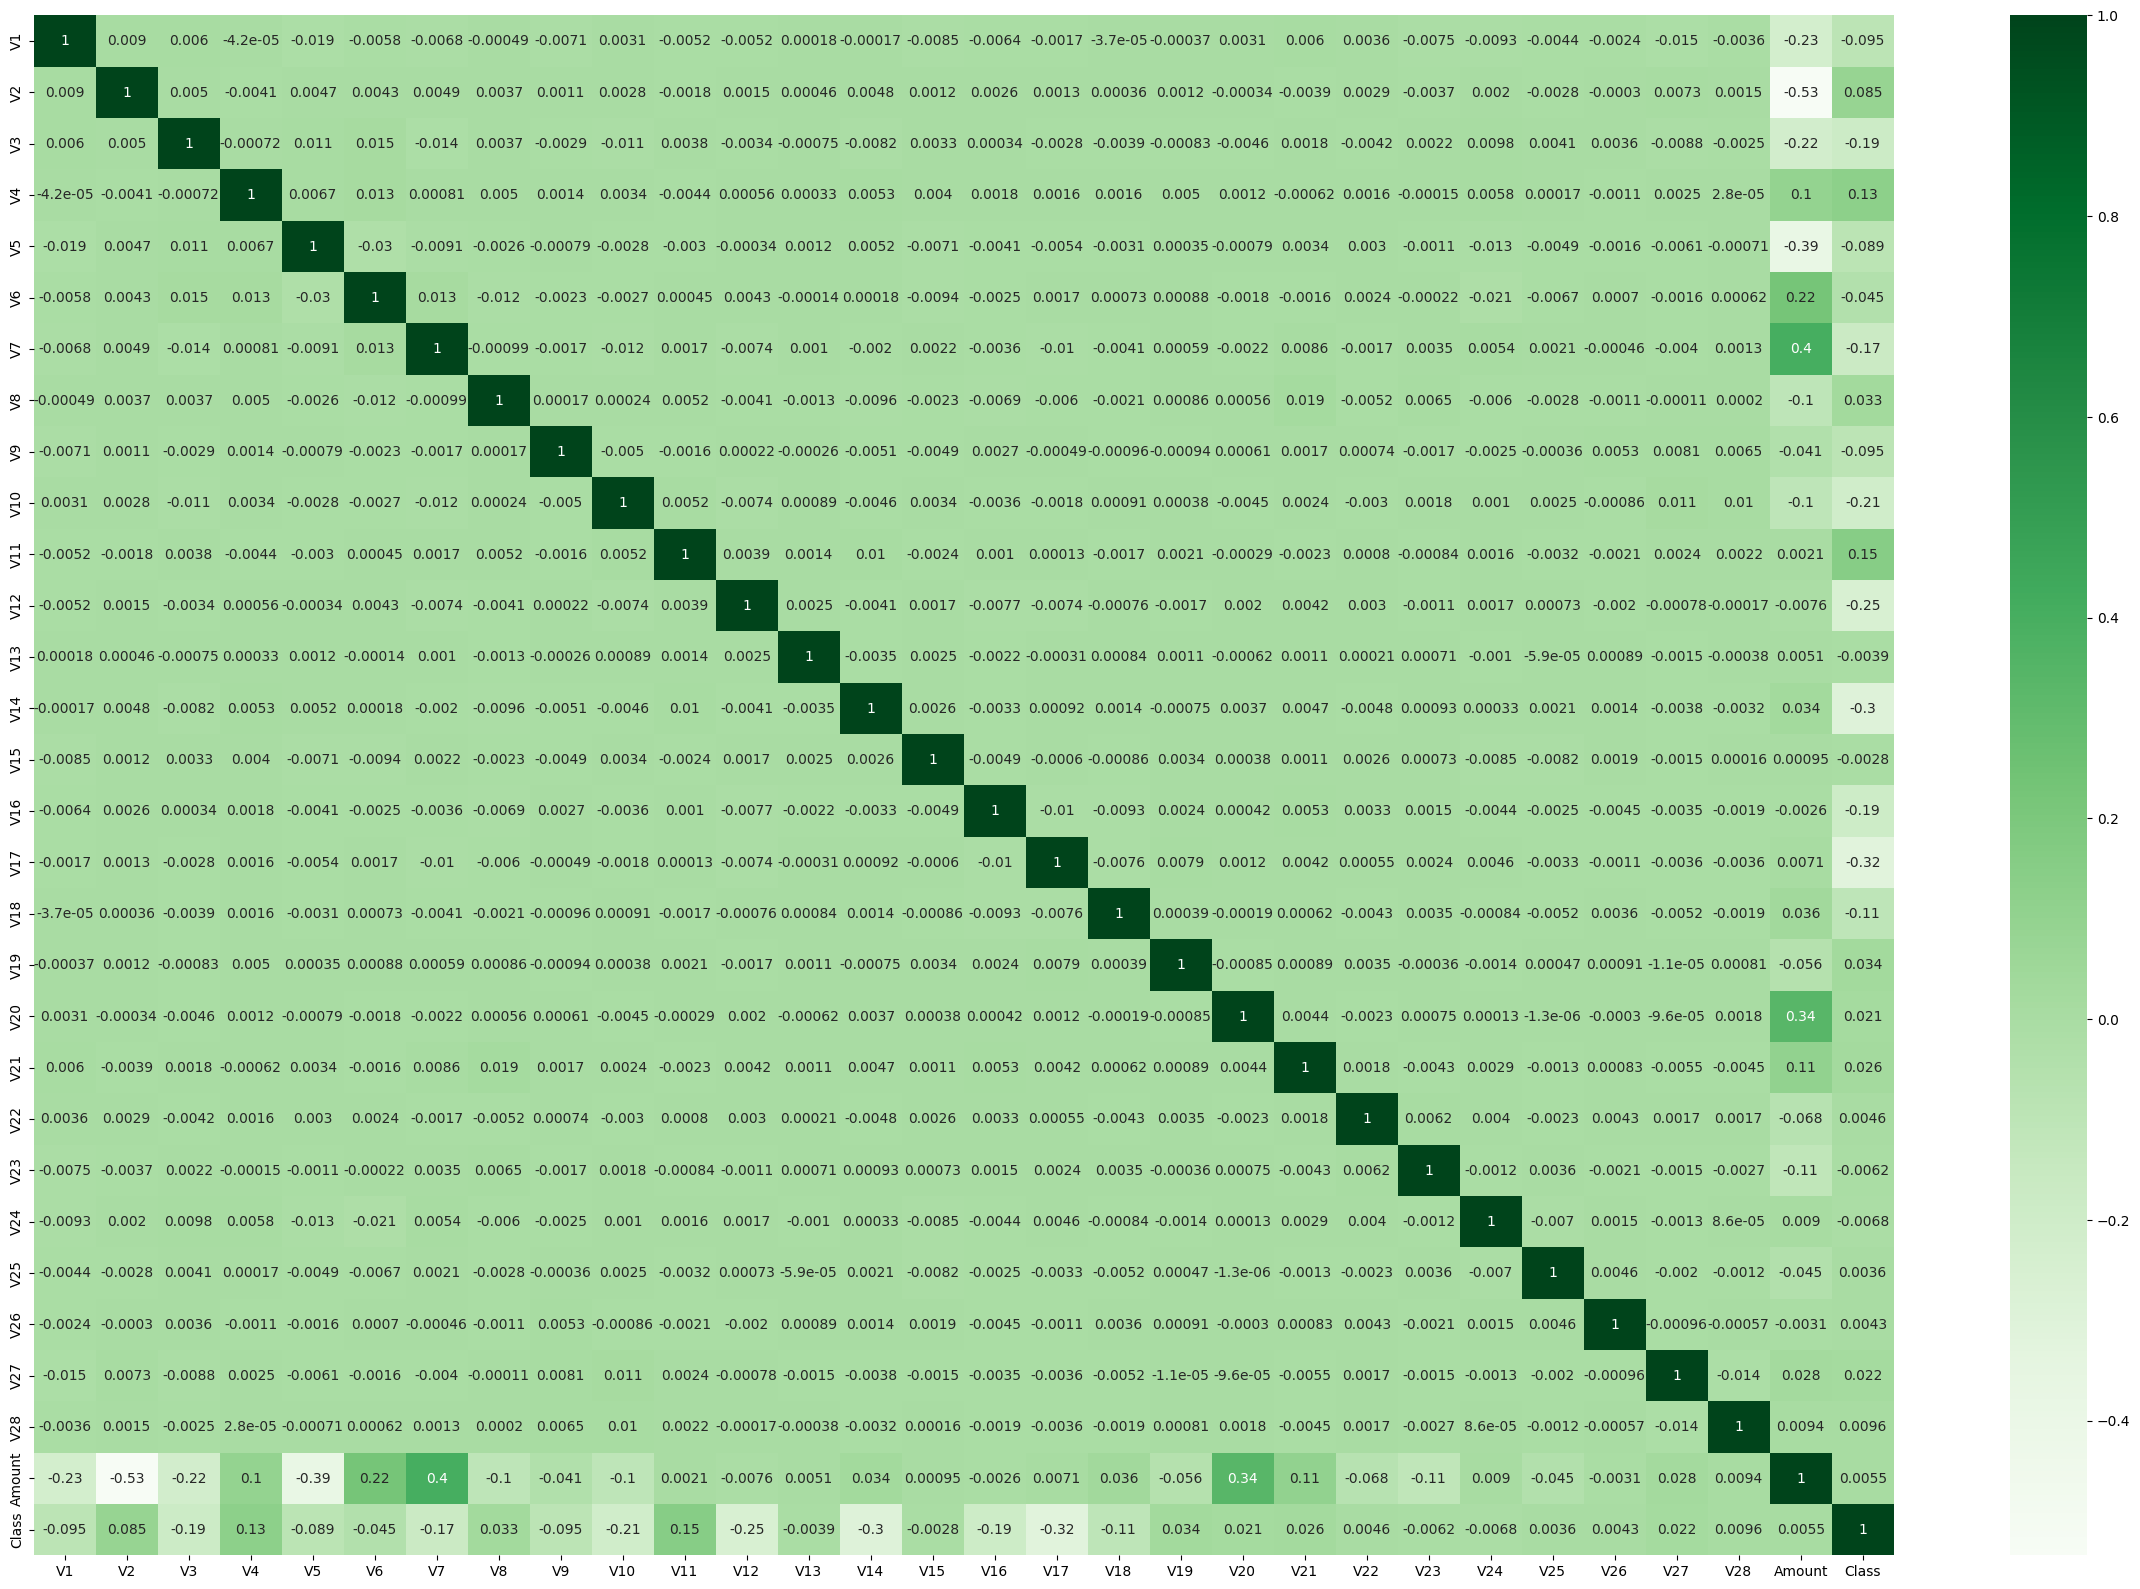

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.subplots(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap="Greens")


Splitting The Dataset Into The Training Set And Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)

Sampling

In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]
fraud.shape

(473, 30)

In [ ]:
normal_sample=normal.sample(n=473)
normal_sample.shape

(473, 30)

In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [ ]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score


Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9315789473684211

In [ ]:
precision_score(y_test,y_pred)

0.9587628865979382

In [ ]:
recall_score(y_test,y_pred)

0.9117647058823529

In [ ]:
f1_score(y_test,y_pred)

0.9346733668341709


Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9157894736842105

In [ ]:
precision_score(y_test,y_pred2)

0.9215686274509803

In [ ]:
recall_score(y_test,y_pred2)

0.9215686274509803

In [ ]:
f1_score(y_test,y_pred2)

0.9215686274509803


Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [ ]:
precision_score(y_test,y_pred3)

0.978494623655914

In [ ]:
recall_score(y_test,y_pred3)

0.8921568627450981

In [ ]:
f1_score(y_test,y_pred3)

0.9333333333333333

Final Data

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})
final_data

,Models,ACC
0,LR,93.157895
1,DT,91.578947
2,RF,93.157895


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=final_data)

https://docs.google.com/spreadsheets/d/1fng6hMmI06BV9g9ccMVPutl0sf6cFtaRRJauJfLFeU0#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


MODEL

In [ ]:
import joblib
joblib.dump(rf,"credit_card_model")
model = joblib.load("credit_card_model")

In [ ]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
